In [15]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [11]:
y = pd.read_csv("../../data/tox_csv/bace.csv", index_col=0)
display(y)
y = np.array(y[["Class", "pIC50"]])
print(y.shape)
print(y)

,rand_smi,cano_smi,Class,pIC50
0,CC1(C)OCC[C@H](C1)NC(=O)[C@@H](Cc1c(N)nc2c(cc(...,Cc1ccccc1-c1ccc2nc(N)c(C[C@@H](C)C(=O)N[C@@H]3...,1,9.154901
1,c1ccccc1CC[C@@H](C(N[C@H]([C@@H]([C@H]1C[C@@H]...,CCCO[C@H]1C[NH2+][C@@H]([C@@H](O)[C@H](Cc2cc(F...,1,8.853872
2,C(c1cn2CCS(N(C)c3cc(cc1c32)C(N[C@@H](Cc1ccccc1...,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...,1,8.698970
3,C(c1cc(ccc1)C(C)(C)C)[NH2+][C@@H]1[C@@H](O)[C@...,CCOC[C@@H](Oc1cc(C[C@@H]2CS(=O)(=O)C[C@H]([NH2...,1,8.698970
4,c1(C[C@H](NC(c2cc3c(CC)cn4c3c(N(S(=O)(=O)CC4)C...,CCc1cn2c3c(cc(C(=O)N[C@@H](Cc4ccccc4)[C@H](O)C...,1,8.698970
...,...,...,...,...
1508,c12nc(N)n(c2ccc(c1)Cl)C(CC(=O)NCC1CCOCC1)CC,CCC(CC(=O)NCC1CCOCC1)n1c(N)nc2cc(Cl)ccc21,0,3.000000
1509,C(=O)(NCc1ncccc1)CC(n1c2c(cc(cc2)Cl)nc1N)CC,CCC(CC(=O)NCc1ccccn1)n1c(N)nc2cc(Cl)ccc21,0,3.000000
1510,C1(CC1c1cc(ccc1)Br)c1nc(n(c(=O)c1)C)N,Cn1c(N)nc(C2CC2c2cccc(Br)c2)cc1=O,0,2.953115
1511,c1c(cccc1)-c1cccc(c1)C1CC1c1cc(=O)n(C)c(n1)N,Cn1c(N)nc(C2CC2c2cccc(-c3ccccc3)c2)cc1=O,0,2.733298


(1513, 2)
[[1.        9.1549015]
 [1.        8.8538723]
 [1.        8.6989698]
 ...
 [0.        2.9531147]
 [0.        2.7332981]
 [0.        2.5445461]]


In [14]:
TfVAE = os.listdir("/workspace/ToxPred/MolKAN/molkan/data/latent")

(12083, 512)
(500, 512)
0.00261054
0.53441006


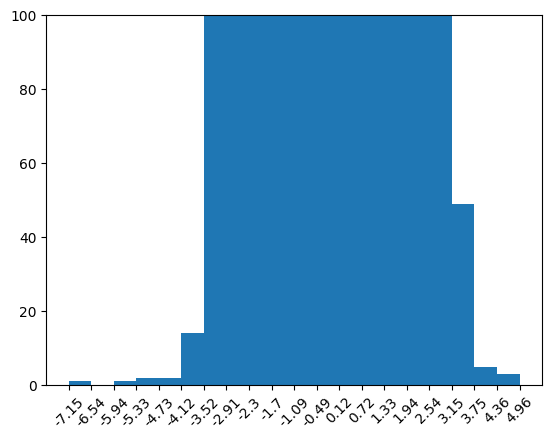

In [44]:
np.random.seed(42)
for enc in TfVAE:
    e = np.load(os.path.join("/workspace/ToxPred/MolKAN/molkan/data/latent", enc))
    print(e.shape)
    print(e[:500,:].shape)
    print(np.mean(e))
    print(np.mean(np.std(e, axis=1)))
    np.random.shuffle(e)
    counts, bin_edges = np.histogram(e[:500].flatten(), bins=20)
    plt.hist(e[:500,:].flatten(), bins=20)
    plt.xticks(bin_edges, labels=np.round(bin_edges, 2), rotation=45)
    plt.ylim(0, 100)
    plt.show()
    break